# Desafio EDA


## Bibliotecas

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Configurando as opções de exibição
pd.set_option('display.max_columns', None)  # Mostrar todas as colunas

In [15]:
# Lendo os dados
df_netflix_daily_top = pd.read_csv('netflix daily top 10.csv', sep=',')
df_netflix_daily_top.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [16]:
# Renomeando as colunas traduzindo para o português
df_netflix_daily_top = df_netflix_daily_top.rename(columns={
    'As of': 'data_posicao',
    'Rank': 'posicao',
    'Year to Date Rank': 'posicao_ano',
    'Last Week Rank': 'posicao_semana_anterior',
    'Title': 'titulo',
    'Type': 'tipo',
    'Netflix Exclusive': 'exclusivo_netflix',
    'Netflix Release Date': 'data_lancamento_netflix',
    'Days In Top 10': 'dias_no_Top10',
    'Viewership Score': 'pontuacao_de_visualização'
})
df_netflix_daily_top.head()

,data_posicao,posicao,posicao_ano,posicao_semana_anterior,titulo,tipo,exclusivo_netflix,data_lancamento_netflix,dias_no_Top10,pontuacao_de_visualização
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


## Período da análise feita

In [17]:
# Obtendo a data inicial e final do período
data_inicial = df_netflix_daily_top['data_posicao'].min()
data_final = df_netflix_daily_top['data_posicao'].max()

print(f'Período da análise feita: de {data_inicial} até {data_final}')

Período da análise feita: de 2020-04-01 até 2022-03-11


## Tamanho da base de dados

In [18]:
print(f'O Tamanho da base é de {df_netflix_daily_top.shape[0]} linhas e {df_netflix_daily_top.shape[1]} colunas.')

O Tamanho da base é de 7100 linhas e 10 colunas.


## Verificar dados nulos

In [19]:
# Somando os nulos das colunas quando ouver
df_netflix_daily_top.isnull().sum()

data_posicao                    0
posicao                         0
posicao_ano                     0
posicao_semana_anterior         0
titulo                          0
tipo                            0
exclusivo_netflix            2501
data_lancamento_netflix         0
dias_no_Top10                   0
pontuacao_de_visualização       0
dtype: int64

In [20]:
df_netflix_daily_top['posicao_semana_anterior'].value_counts()

posicao_semana_anterior
-     3968
1      653
2      564
3      452
4      336
5      282
6      240
7      193
8      167
9      133
10     112
Name: count, dtype: int64

In [21]:
df_netflix_daily_top['posicao_ano'].value_counts()

posicao_ano
-     859
2     708
1     708
3     706
4     705
5     699
6     675
7     633
8     554
9     481
10    372
Name: count, dtype: int64

In [22]:
# tratando os nulos e strings sem significado
# Substituindo os valores '-' por '0' na coluna 'posicao_semana_anterior'
df_netflix_daily_top['posicao_semana_anterior'] = df_netflix_daily_top['posicao_semana_anterior'].replace('-', '0')
df_netflix_daily_top['posicao_ano'] = df_netflix_daily_top['posicao_ano'].replace('-', '0')
# Substituindo os valores nulos (NaN) por 'No' na coluna 'exclusivo_netflix'
df_netflix_daily_top['exclusivo_netflix'] = df_netflix_daily_top['exclusivo_netflix'].fillna('No')
df_netflix_daily_top.head()


,data_posicao,posicao,posicao_ano,posicao_semana_anterior,titulo,tipo,exclusivo_netflix,data_lancamento_netflix,dias_no_Top10,pontuacao_de_visualização
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,0,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,No,"Mar 28, 2019",9,76
3,2020-04-01,4,4,0,Blood Father,Movie,No,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [23]:
df_netflix_daily_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   data_posicao               7100 non-null   object
 1   posicao                    7100 non-null   int64 
 2   posicao_ano                7100 non-null   object
 3   posicao_semana_anterior    7100 non-null   object
 4   titulo                     7100 non-null   object
 5   tipo                       7100 non-null   object
 6   exclusivo_netflix          7100 non-null   object
 7   data_lancamento_netflix    7100 non-null   object
 8   dias_no_Top10              7100 non-null   int64 
 9   pontuacao_de_visualização  7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


## Outliers

In [24]:
# Convertendo para o tipo mais adequado
# Convertendo as colunas de string para datetime
df_netflix_daily_top['data_posicao'] = pd.to_datetime(df_netflix_daily_top['data_posicao'])
df_netflix_daily_top['data_lancamento_netflix'] = pd.to_datetime(df_netflix_daily_top['data_lancamento_netflix'])

# Convertendo as colunas de string para int64
df_netflix_daily_top['posicao_ano'] = df_netflix_daily_top['posicao_ano'].astype('int64')
df_netflix_daily_top['posicao_semana_anterior'] = df_netflix_daily_top['posicao_semana_anterior'].astype('int64')
df_netflix_daily_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   data_posicao               7100 non-null   datetime64[ns]
 1   posicao                    7100 non-null   int64         
 2   posicao_ano                7100 non-null   int64         
 3   posicao_semana_anterior    7100 non-null   int64         
 4   titulo                     7100 non-null   object        
 5   tipo                       7100 non-null   object        
 6   exclusivo_netflix          7100 non-null   object        
 7   data_lancamento_netflix    7100 non-null   datetime64[ns]
 8   dias_no_Top10              7100 non-null   int64         
 9   pontuacao_de_visualização  7100 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 554.8+ KB


In [25]:
df_netflix_daily_top.head()

,data_posicao,posicao,posicao_ano,posicao_semana_anterior,titulo,tipo,exclusivo_netflix,data_lancamento_netflix,dias_no_Top10,pontuacao_de_visualização
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,0,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,No,2019-03-28,9,76
3,2020-04-01,4,4,0,Blood Father,Movie,No,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55


In [26]:
df_netflix_daily_top.describe() # Parei aqui!!!

,data_posicao,posicao,posicao_ano,posicao_semana_anterior,data_lancamento_netflix,dias_no_Top10,pontuacao_de_visualização
count,7100,7100.000000,7100.000000,7100.000000,7100,7100.000000,7100.000000
mean,2021-03-21 12:00:00.000000256,5.500000,4.439296,1.737324,2020-06-21 08:05:32.619718144,24.123662,122.790141
min,2020-04-01 00:00:00,1.000000,0.000000,0.000000,2007-01-15 00:00:00,1.000000,1.000000
25%,2020-09-25 00:00:00,3.000000,2.000000,0.000000,2020-04-26 00:00:00,3.000000,19.000000
50%,2021-03-21 12:00:00,5.500000,4.000000,0.000000,2020-10-02 00:00:00,7.000000,50.000000
75%,2021-09-15 00:00:00,8.000000,7.000000,3.000000,2021-05-14 00:00:00,18.000000,128.000000
max,2022-03-11 00:00:00,10.000000,10.000000,10.000000,2022-03-04 00:00:00,428.000000,1474.000000
std,NaN,2.872484,3.041267,2.620020,NaN,58.473789,213.861642


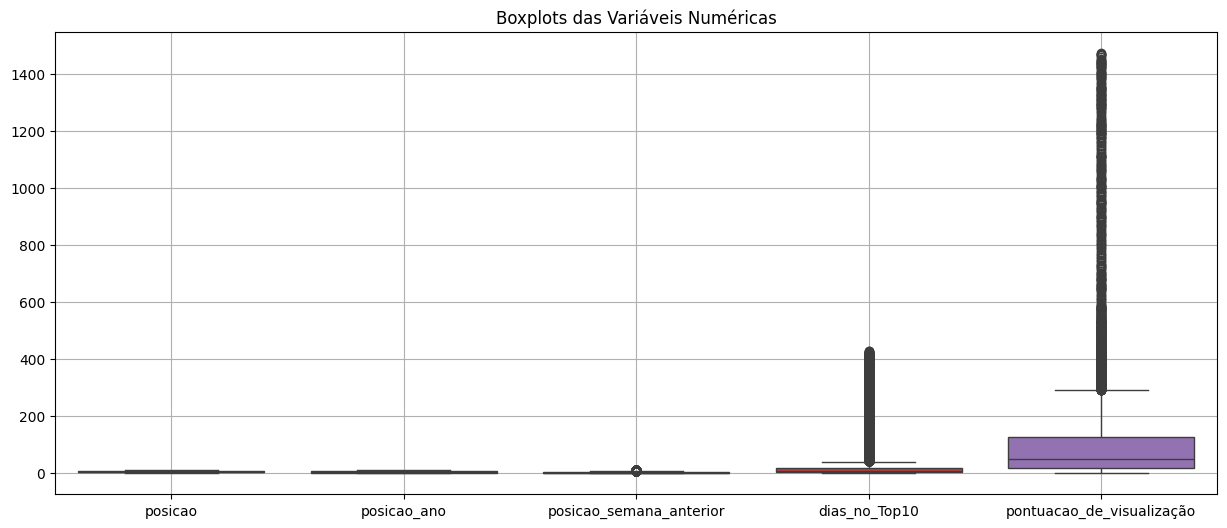

In [33]:
import seaborn as sns

# Criando boxplot múltiplo em uma única figura
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_netflix_daily_top[['posicao', 'posicao_ano', 
            'posicao_semana_anterior', 'dias_no_Top10', 
            'pontuacao_de_visualização']])

#plt.xticks(rotation=45)
plt.title('Boxplots das Variáveis Numéricas')
plt.grid(True)
plt.show()

<Axes: >

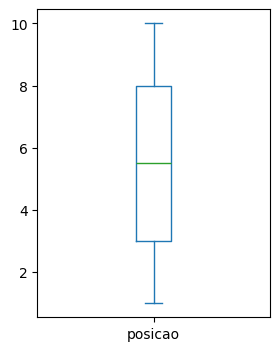

In [27]:
# Box plot da posicao
ax = df_netflix_daily_top.posicao.plot.box()
ax.figure.set_size_inches(3, 4)
ax

<Axes: >

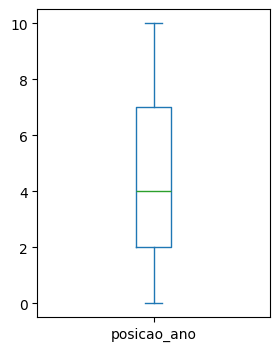

In [28]:
# Box plot da posicao no ano
ax = df_netflix_daily_top.posicao_ano.plot.box()
ax.figure.set_size_inches(3, 4)
ax